Kaggle link

https://www.kaggle.com/datasets/shivan118/big-mart-sales-prediction-datasets

About Dataset

**Sales Prediction for Big Mart Outlets**

Indented blockThe data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

**Importing required libraies**

In [1]:
# importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Importing Train DataSet**

In [3]:
# loading the data from csv file to a pandas dataframe

df_train = pd.read_csv('/content/Train _sales.csv')

In [4]:
# printing the first 5 columns of the dataframe
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# last 5 rows of the dataframe
df_train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [6]:
# number of rows & columns in the dataframe
df_train.shape

(8523, 12)

**statistical information**

In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800



**Checking the outlayers in the data by using the Boxplot**

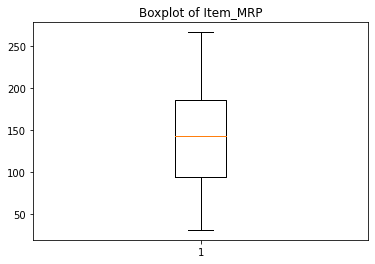

In [8]:
plt.boxplot(df_train['Item_MRP'])
plt.title('Boxplot of Item_MRP')
plt.show()

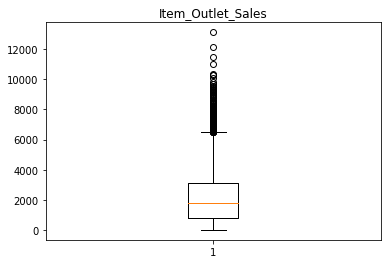

In [9]:
plt.boxplot(df_train['Item_Outlet_Sales'])
plt.title('Item_Outlet_Sales')
plt.show()

In [10]:
# Calculate the median for a column
#median = df_train['Item_Outlet_Sales'].median()

# Replace any data point that is more than 3 standard deviations away from the median with the median value
#std = 3 * df_train['Item_Outlet_Sales'].std()
#df_train.loc[(df_train['Item_Outlet_Sales'] - median).abs() > std, 'Item_Outlet_Sales'] = median
     

In [11]:
#plt.boxplot(df_train['Item_Outlet_Sales'])
#plt.title('Item_Outlet_Sales')
#plt.show()
     

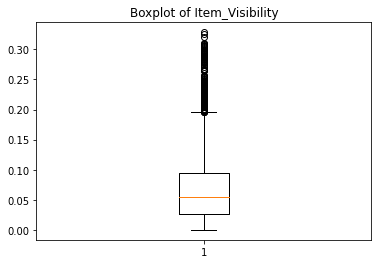

In [12]:
plt.boxplot(df_train['Item_Visibility'])
plt.title('Boxplot of Item_Visibility')
plt.show()

In [13]:
# Calculate the median for a column
#median = df_train['Item_Visibility'].median()

# Replace any data point that is more than 3 standard deviations away from the median with the median value
#std = 3 * df_train['Item_Visibility'].std()
#df_train.loc[(df_train['Item_Visibility'] - median).abs() > std, 'Item_Visibility'] = median
     

In [14]:
#plt.boxplot(df_train['Item_Visibility'])
#plt.title('Boxplot of Item_Visibility')
#plt.show()
     

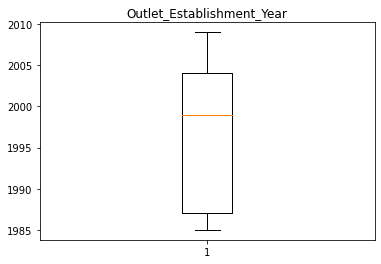

In [15]:
plt.boxplot(df_train['Outlet_Establishment_Year'])
plt.title('Outlet_Establishment_Year')
plt.show()

**Exploratory Data Analysis**

In [16]:
df_train.shape

(8523, 12)

In [17]:
df_train.dtypes #dtypes is to know what type of data it is

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [18]:
# checking for missing values
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

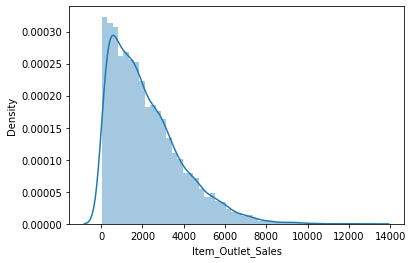



skewness: 1.177531
kurtosis: 1.615877


In [19]:
# Skewness is a measure of symmetry, or more precisely, the lack of symmetry.
# A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. 
# Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

import warnings
warnings.filterwarnings("ignore")

#kernel density plot
sns.distplot(df_train.Item_Outlet_Sales)
plt.show()
print('\n')
print("skewness: %f" % df_train ["Item_Outlet_Sales" ].skew())
print("kurtosis: %f" % df_train ["Item_Outlet_Sales" ].kurt())

In [20]:
#descriptuve statistics summary of target variable
df_train['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

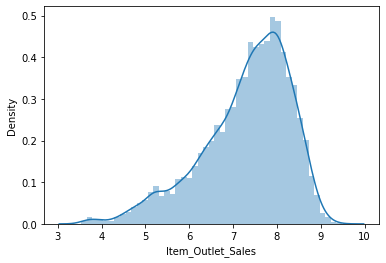

skewness: -0.882266
kurtosis: 0.532920


In [21]:
#log transformation used to transform skwed data to approximately conform to normality

#log transform the target
df_train["Item_Outlet_Sales"] =np.log1p(df_train["Item_Outlet_Sales"])

#kernel Density plot
sns.distplot(df_train.Item_Outlet_Sales);
plt.show()

print("skewness: %f" % df_train["Item_Outlet_Sales"].skew())
print("kurtosis: %f" % df_train["Item_Outlet_Sales"].kurt())


In [22]:
df_train['Item_Fat_Content'].describe()

count        8523
unique          5
top       Low Fat
freq         5089
Name: Item_Fat_Content, dtype: object

In [23]:
df_train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [24]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'})
df_train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [25]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [26]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)

In [27]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [28]:
df_train['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [29]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [30]:
df_train['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [31]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)

In [32]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**Checking correlation and visualizing it**

In [33]:
df_train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.008059
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.192996
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.509886
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,0.077032
Item_Outlet_Sales,0.008059,-0.192996,0.509886,0.077032,1.000000


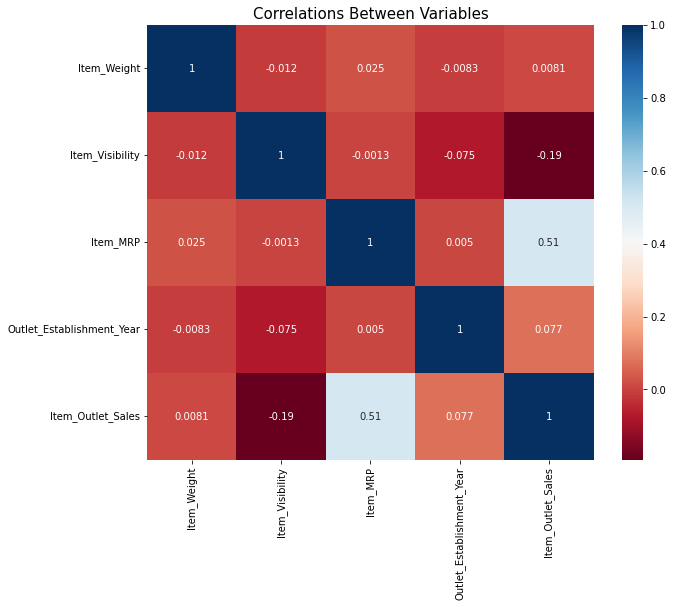

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(), cmap="RdBu",annot=True)
plt.title("Correlations Between Variables", size=15)
plt.show() #'RdBu' says take red to blue and having white in the middle , Red is negatively correlated and Blue is positively correlated

In [35]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [36]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,8.225808
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,6.096776
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,7.648868
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,6.597664
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,6.903451
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,7.929984
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,6.310436
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,7.085159
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,7.521100


In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [38]:
num=df_train._get_numeric_data() 
num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,8.225808
1,5.92,0.019278,48.2692,2009,6.096776
2,17.50,0.016760,141.6180,1999,7.648868
3,19.20,0.000000,182.0950,1998,6.597664
4,8.93,0.000000,53.8614,1987,6.903451


In [39]:
cat=df_train.drop(num,axis=1)
cat.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,Medium,Tier 3,Grocery Store
4,Low Fat,Household,High,Tier 3,Supermarket Type1


In [40]:
df_dummies =pd.get_dummies(cat)
df_dummies


,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
8520,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [41]:
final_data=num.join(df_dummies)
final_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,8.225808,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,6.096776,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,7.648868,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,6.597664,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,6.903451,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [42]:
final_data.shape

(8523, 33)

Lasso Regression:

**Y = wX + b**

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

Lasso_Regression model building without using sklearn

In [45]:
import numpy as np
import pandas as pd

class LassoRegression:

    # initiating the hyperparameters
    def __init__(self, lambda_parameter, no_of_iterations, learning_rate):
        self.lambda_parameter = lambda_parameter
        self.no_of_iterations = no_of_iterations
        self.learning_rate = learning_rate
    
    # fitting the dataset to the Lasso Regression model
    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        self.b = np.mean(y)

        # implementing Gradient Descent algorithm for Optimization
        for i in range(self.no_of_iterations):
            coef_w = np.copy(self.w)
            for j in range(X.shape[1]): #This line begins a nested for loop that will iterate over each feature in the feature matrix X. 
                X_j = X[:,j]
                X_not_j = np.delete(X, j, axis=1)

                # linear equation of the model
                y_pred = self.b + X_not_j.dot(self.w[np.arange(X.shape[1]) != j])

                residual_j = X_j.dot(y - y_pred)

                if residual_j < -self.lambda_parameter/2:
                    self.w[j] = (residual_j + self.lambda_parameter/2) / np.sum(X_j**2)
                elif residual_j > self.lambda_parameter/2:
                    self.w[j] = (residual_j - self.lambda_parameter/2) / np.sum(X_j**2)
                else:
                    self.w[j] = 0
                    
            if np.linalg.norm(self.w - coef_w) < self.learning_rate:
                break

    # Predicting the Target variable
    def predict(self, X):
        return self.b + X.dot(self.w)

    # R-squared coefficient to evaluate the model
    def r_squared(self, X, y):
        y_pred = self.predict(X)
        SS_res = np.sum((y - y_pred)**2)
        SS_tot = np.sum((y - np.mean(y))**2)
        return 1 - (SS_res / SS_tot)

    # Cross Validation score for K-fold cross validation
    def cross_val_score(self, X, y, k=5):
        n = X.shape[0]      #This line gets the number of rows (samples) in the feature array X
        idx = np.arange(n)  # This line creates an array of integers from 0 to n-1.
        np.random.shuffle(idx)
        X_folds = np.array_split(X[idx], k)  
        y_folds = np.array_split(y[idx], k)
        scores = []  #this line initializes an empty list scores to store the R-squared scores.
        for i in range(k):
            X_train = np.vstack(X_folds[:i] + X_folds[i+1:])
            y_train = np.concatenate(y_folds[:i] + y_folds[i+1:])
            #This line concatenates all the y sub-arrays except the i-th sub-array to create the training target array y_train.
            X_valid = X_folds[i]
            y_valid = y_folds[i] #This line selects the i-th sub-array of y as the validation target array y_valid.
            self.fit(X_train, y_train)
            score = self.r_squared(X_valid, y_valid)
            scores.append(score)
            #This line adds the R-squared score to the scores list.
        return scores

# Grid search to tune the hyperparameters
    def grid_search(self, X, y, param_grid, k=5):
        best_score = -np.inf
        best_params = None
        for params in param_grid:
            self.lambda_parameter = params['lambda']
            self.no_of_iterations = params['iterations']
            self.learning_rate = params['learning_rate']
            scores = self.cross_val_score(X, y, k=k)
            mean_score = np.mean(scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = params
        self.lambda_parameter = best_params['lambda']
        self.no_of_iterations = best_params['iterations']
        self.learning_rate = best_params['learning_rate']

    # Get coefficients of the model
    def get_coefficients(self):
        return self.w, self.b


**Splitting Data into Train and Test**

In [46]:
model = LassoRegression(lambda_parameter=0.1, no_of_iterations=1000, learning_rate=0.001)

# Split the data into features and target variable
X = final_data.drop('Item_Outlet_Sales', axis=1)
y = final_data['Item_Outlet_Sales']
     

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.fit(X_train.values, y_train)
y_pred = model.predict(X_test.values)

print(y_pred)

[6.94260796 6.74669466 6.71874731 ... 5.9417747  7.44451948 8.31853709]


In [47]:
# Define the hyperparameters to search over
param_grid = {'lambda': [0.001, 0.01, 0.1, 1, 10],
              'iterations': [100, 500, 1000],
              'learning_rate': [0.001, 0.01, 0.1]}
for params in param_grid:
    lambda_parameter = params[0]
    no_of_iterations = params[1]
    learning_rate = params[2]
             
# Create a Lasso Regression object
model = LassoRegression(lambda_parameter=0.1, no_of_iterations=1000, learning_rate=0.01)

# Print the best hyperparameters and the corresponding cross-validation score
print('Best hyperparameters:', model.lambda_parameter, model.no_of_iterations, model.learning_rate)
print('Cross-validation score:', np.mean(model.cross_val_score(X_train.values, y_train.values, k=5)))


Best hyperparameters: 0.1 1000 0.01
Cross-validation score: 0.7118296737614381


In [48]:


#cv_scores = LassoRegression.cross_val_score(X, y, k=5)
cv_scores = model.cross_val_score(X_train.values, y_train.values, k=5)


print("Cross Validation scores:", cv_scores)
print("Average CV score:", np.mean(cv_scores))

# Fit the model on the entire dataset
#LassoRegression.fit(X, y)
model.fit(X_train.values, y_train.values)


# Make predictions on new data

X_new = pd.DataFrame([[0]*32])
X_new.iloc[0, :7] = [0.01, 0.001, 0.0001, 0.1, 1, 10, 100]
y_new = model.predict(X_new)
print("Prediction:", y_new)



Cross Validation scores: [0.7230381720989476, 0.7204163731648257, 0.7100309473250765, 0.6908311954444274, 0.7173632392813376]
Average CV score: 0.712335985462923
Prediction: 0    7.468522
dtype: float64


In [49]:
# Define the hyperparameters to search over
param_grid = {'lambda': [0.001, 0.01, 0.1, 1, 10],
              'iterations': [100, 500, 1000],
              'learning_rate': [0.001, 0.01, 0.1]}
# Perform a grid search to find the best hyperparameters
#model.grid_search(X_train.values, y_train.values, param_grid, k=5)

# get the best hyperparameters
best_lambda = model.lambda_parameter
best_iterations = model.no_of_iterations
best_learning_rate =model .learning_rate

# create a new instance of LassoRegression with the best hyperparameters
model_tuned = LassoRegression(best_lambda, best_iterations, best_learning_rate)



# fit the model with the full dataset using the best hyperparameters
model_tuned.fit(X_train.values, y_train)


# get the predictions
y_pred_tuned = model_tuned.predict(X_test)


# assuming y_pred_tuned is a pandas Series object
y_pred_tuned = y_pred_tuned.to_frame() 

# add a column with the label "predicted_target"
y_pred_tuned.columns = ["Outlet_Sales"]

# display the first few rows of the DataFrame with the new label
print(y_pred_tuned.head())




      Outlet_Sales
7503      6.987632
2957      6.801032
7031      6.788868
1084      8.258714
856       8.001927


In [50]:
model.fit(X_train.values, y_train)
y_pred = model.predict(X_test.values)


print(y_pred)

[6.98763192 6.80103181 6.78886753 ... 5.90298155 7.45643501 8.25824458]


In [51]:
# Make predictions on the test set
y_pred = model.predict(X_test.values)

# Calculate mean squared error
mse = ((y_test.values - y_pred) ** 2).mean()

# Calculate root mean squared error
rmse = np.sqrt(mse)

# Calculate mean absolute error
mae = np.abs(y_test.values - y_pred).mean()

# Calculate R-squared
ssr = ((y_pred - y_test.values) ** 2).sum()
sst = ((y_test.values - y_test.values.mean()) ** 2).sum()
r_squared = 1 - (ssr / sst)

# Print the error metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r_squared)


Mean Squared Error: 0.2902278744630054
Root Mean Squared Error: 0.5387280152943649
Mean Absolute Error: 0.41833954426287207
R-squared: 0.7247470599601207


In [52]:
#from sklearn.metrics import r2_score, mean_absolute_error, median_absolute_error

#r2 = r2_score(y_test, y_pred)
#mae = mean_absolute_error(y_test, y_pred)
#medae = median_absolute_error(y_test, y_pred)

#print(f"R^2 Score: {r2}")
#print(f"Mean Absolute Error: {mae}")
#print(f"Median Absolute Error: {medae}")


Handling the TEST Data

In [53]:
df_test= pd.read_csv("/content/Test _sales.csv")

In [54]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [55]:
df_test.shape

(5681, 11)

In [56]:
#statistical information
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,4705.0,12.695633,4.664849,4.555,8.645000,12.500000,16.700000,21.350000
Item_Visibility,5681.0,0.065684,0.051252,0.000,0.027047,0.054154,0.093463,0.323637
Item_MRP,5681.0,141.023273,61.809091,31.990,94.412000,141.415400,186.026600,266.588400
Outlet_Establishment_Year,5681.0,1997.828903,8.372256,1985.000,1987.000000,1999.000000,2004.000000,2009.000000


In [57]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [58]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [59]:
df_test.dtypes #dtypes is to know what type of data it is

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

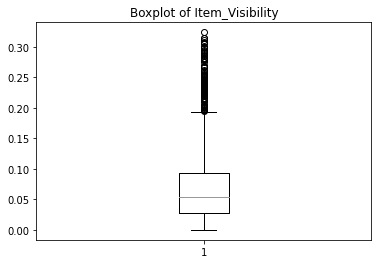

In [60]:
plt.boxplot(df_test['Item_Visibility'])
plt.title('Boxplot of Item_Visibility')
plt.show()

In [61]:
# Calculate the median for a column
#median = df_test['Item_Visibility'].median()

# Replace any data point that is more than 3 standard deviations away from the median with the median value
#std = 3 * df_test['Item_Visibility'].std()
#df_test.loc[(df_test['Item_Visibility'] - median).abs() > std, 'Item_Visibility'] = median
     


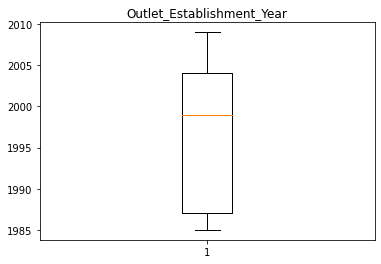

In [62]:
plt.boxplot(df_test['Outlet_Establishment_Year'])
plt.title('Outlet_Establishment_Year')
plt.show()

In [63]:
df_test.Item_Fat_Content.unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [64]:
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'})
df_test.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [65]:
df_test['Item_Weight'].describe()

count    4705.000000
mean       12.695633
std         4.664849
min         4.555000
25%         8.645000
50%        12.500000
75%        16.700000
max        21.350000
Name: Item_Weight, dtype: float64

In [66]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [67]:
df_test['Item_Weight'].fillna(df_test['Item_Weight'].median(),inplace=True)
     

In [68]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [69]:
df_test['Item_Weight'].describe()

count    5681.000000
mean       12.662023
std         4.245831
min         4.555000
25%         9.195000
50%        12.500000
75%        15.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [70]:
df_test['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [71]:
df_test['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [72]:
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)
     

In [73]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [74]:
df_test.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.018342,0.045048,0.025678
Item_Visibility,-0.018342,1.000000,-0.014013,-0.097040
Item_MRP,0.045048,-0.014013,1.000000,-0.007233
Outlet_Establishment_Year,0.025678,-0.097040,-0.007233,1.000000


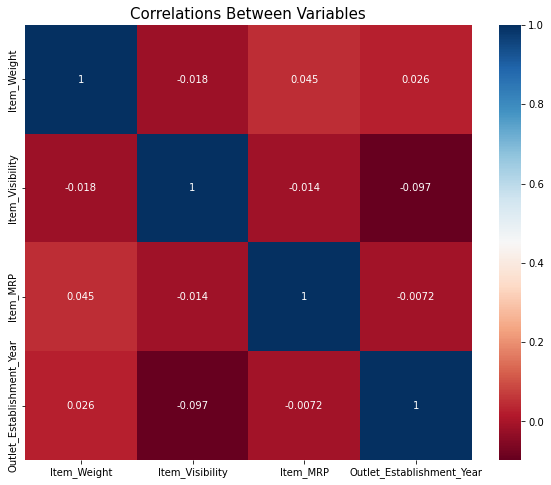

In [75]:
plt.figure(figsize=(10,8))
sns.heatmap(df_test.corr(), cmap="RdBu",annot=True)
plt.title("Correlations Between Variables", size=15)
plt.show() #'RdBu' says take red to blue and having white in the middle , Red is negatively correlated and Blue is positively correlated
     

In [76]:
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [77]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5681 non-null   float64
 1   Item_Fat_Content           5681 non-null   object 
 2   Item_Visibility            5681 non-null   float64
 3   Item_Type                  5681 non-null   object 
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Establishment_Year  5681 non-null   int64  
 6   Outlet_Size                5681 non-null   object 
 7   Outlet_Location_Type       5681 non-null   object 
 8   Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 399.6+ KB


In [78]:
test_num=df_test._get_numeric_data() 
test_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,20.750,0.007565,107.8622,1999
1,8.300,0.038428,87.3198,2007
2,14.600,0.099575,241.7538,1998
3,7.315,0.015388,155.0340,2007
4,12.500,0.118599,234.2300,1985


In [79]:
test_cat=df_test.drop(test_num,axis=1)
test_cat.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Snack Foods,Medium,Tier 1,Supermarket Type1
1,Regular,Dairy,Medium,Tier 2,Supermarket Type1
2,Low Fat,Others,Medium,Tier 3,Grocery Store
3,Low Fat,Snack Foods,Medium,Tier 2,Supermarket Type1
4,Regular,Dairy,Medium,Tier 3,Supermarket Type3


In [80]:
dum=pd.get_dummies(test_cat)
dum.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [81]:
final_test_data=test_num.join(dum)
final_test_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750,0.007565,107.8622,1999,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,8.300,0.038428,87.3198,2007,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,14.600,0.099575,241.7538,1998,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,7.315,0.015388,155.0340,2007,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,12.500,0.118599,234.2300,1985,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [82]:
# get the predictions
y_pred_test = model_tuned.predict(final_test_data)

# print the predictions
print(y_pred_test)

0       7.259538
1       7.069556
2       6.318730
3       7.643918
4       8.679028
          ...   
5676    7.552845
5677    7.536079
5678    7.383127
5679    8.117148
5680    7.081229
Length: 5681, dtype: float64


In [83]:
#y_pred_test=pd.DataFrame(final_test_data,columns=['Outlet_Sales'])
     

In [84]:
# assuming y_pred_test is a pandas Series object
y_pred_test = y_pred_test.to_frame() 

# add a column with the label "predicted_target"
y_pred_test.columns = ["Outlet_Sales"]

# display the first few rows of the DataFrame with the new label
print(y_pred_test.head())


   Outlet_Sales
0      7.259538
1      7.069556
2      6.318730
3      7.643918
4      8.679028


In [85]:
y_pred_test.head()

,Outlet_Sales
0,7.259538
1,7.069556
2,6.318730
3,7.643918
4,8.679028


In [86]:
final_test=pd.concat([df_test,y_pred_test],axis=1)

In [87]:
final_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Sales
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1,7.259538
1,8.300,Regular,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1,7.069556
2,14.600,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store,6.318730
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1,7.643918
4,12.500,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3,8.679028
